<a href="https://colab.research.google.com/github/Prerna99-star/Support-Vector-Machine/blob/master/K_Fold_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K FOLD CLASSIFICATION


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
#Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
Y = dataset.iloc[:, 4].values
print(dataset)
print(X)
print(Y)

      User ID  Gender   Age  EstimatedSalary  Purchased
0    15624510    Male  19.0          19000.0          0
1    15810944    Male  35.0          20000.0          0
2    15668575  Female  26.0          43000.0          0
3    15603246  Female  27.0          57000.0          0
4    15804002    Male  19.0          76000.0          0
..        ...     ...   ...              ...        ...
395  15691863  Female  46.0          41000.0          1
396  15706071    Male  51.0          23000.0          1
397  15654296  Female  50.0          20000.0          1
398  15755018    Male  36.0          33000.0          0
399  15594041  Female  49.0          36000.0          1

[400 rows x 5 columns]
[[1.90e+01 1.90e+04]
 [3.50e+01 2.00e+04]
 [2.60e+01 4.30e+04]
 [2.70e+01 5.70e+04]
 [1.90e+01 7.60e+04]
 [2.70e+01 5.80e+04]
 [2.70e+01 8.40e+04]
 [3.20e+01 1.50e+05]
 [2.50e+01 3.30e+04]
 [3.50e+01 6.50e+04]
 [2.60e+01 8.00e+04]
 [2.60e+01 5.20e+04]
 [2.00e+01 8.60e+04]
 [3.20e+01 1.80e+04]
 [1.80e+01

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [4]:
from sklearn.preprocessing import StandardScaler
Sc_X = StandardScaler() 
X_train = Sc_X.fit_transform(X_train)
X_test = Sc_X.transform(X_test)
print(X_train)
print(X_test)

[[ 0.20354832  1.05188772]
 [ 0.29763846 -0.50499669]
 [-0.07872208  1.90109741]
 [-0.36099248 -0.75975959]
 [ 1.8030806  -1.04282949]
 [ 0.67399899  0.25929202]
 [ 0.76808913  0.51405493]
 [-1.86643463 -0.50499669]
 [-0.83144315 -0.75975959]
 [-1.67825436  0.34421299]
 [-0.92553329 -0.30684776]
 [-1.20780369  0.28759901]
 [ 2.085351   -0.67483863]
 [ 0.10945819 -0.78806658]
 [-0.54917275 -1.46743433]
 [ 1.89717074  0.71220385]
 [ 0.01536806  0.03283611]
 [-1.39598396 -1.18436443]
 [ 0.86217926 -1.12775046]
 [-1.77234449 -1.2692854 ]
 [-0.17281221  1.56141353]
 [ 0.29763846  0.0611431 ]
 [ 1.14444966 -0.95790852]
 [ 0.10945819  0.03283611]
 [-1.49007409 -0.19361981]
 [ 0.76808913  0.25929202]
 [ 1.89717074 -1.32589938]
 [ 0.57990886 -0.87298755]
 [ 0.20354832  0.03283611]
 [ 0.10945819  1.47649257]
 [-0.64326288  0.03283611]
 [ 0.86217926 -1.0145225 ]
 [ 1.33262993  2.26908827]
 [ 1.5208102   0.00452912]
 [-1.11371355 -1.52404831]
 [ 1.99126087 -0.78806658]
 [ 0.9562694   1.92940439]
 

In [5]:
#Fitting Classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [6]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

[1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0]


In [7]:
# Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[65  6]
 [ 2 27]]


In [11]:
# Applying K-fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 10)
accuracies.mean()
accuracies.std()

0.04333333333333332

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


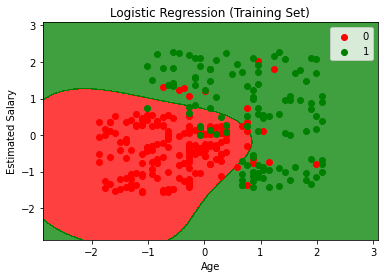

In [12]:
# visualizing the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid( np.arange(start = X_set[:, 0].min()-1, stop = X_set[:, 0].max()+1, step = 0.01),
        np.arange(start = X_set[:, 0].min()-1, stop = X_set[:, 0].max()+1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                 c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


In [0]:
# visualizing the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid( np.arange(start = X_set[:, 0].min()-1, stop = X_set[:, 0].max()+1, step = 0.01),
        np.arange(start = X_set[:, 0].min()-1, stop = X_set[:, 0].max()+1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                 c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
